**Reference**: <https://daviddalpiaz.github.io/appliedstats/multiple-linear-regression.html>

In [9]:
library(tidyverse)
# read the data from the web
autompg = read.table(
  "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
  quote = "\"",
  comment.char = "",
  stringsAsFactors = FALSE)
# give the dataframe headers
colnames(autompg) = c("mpg", "cyl", "disp", "hp", "wt", "acc", "year", "origin", "name")
# remove missing data, which is stored as "?"
autompg = subset(autompg, autompg$hp != "?")
# remove the plymouth reliant, as it causes some issues
autompg = subset(autompg, autompg$name != "plymouth reliant")
# give the dataset row names, based on the engine, year and name
rownames(autompg) = paste(autompg$cyl, "cylinder", autompg$year, autompg$name)
# remove the variable for name, as well as origin
autompg = subset(autompg, select = c("mpg", "cyl", "disp", "hp", "wt", "acc", "year"))
# change horsepower from character to numeric
autompg$hp = as.numeric(autompg$hp)
# check final structure of data
str(autompg)

autompg <- as_tibble(autompg)
autompg %>% head()

'data.frame':	390 obs. of  7 variables:
 $ mpg : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cyl : int  8 8 8 8 8 8 8 8 8 8 ...
 $ disp: num  307 350 318 304 302 429 454 440 455 390 ...
 $ hp  : num  130 165 150 150 140 198 220 215 225 190 ...
 $ wt  : num  3504 3693 3436 3433 3449 ...
 $ acc : num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year: int  70 70 70 70 70 70 70 70 70 70 ...


mpg,cyl,disp,hp,wt,acc,year
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
18,8,307,130,3504,12.0,70
15,8,350,165,3693,11.5,70
18,8,318,150,3436,11.0,70
16,8,304,150,3433,12.0,70
17,8,302,140,3449,10.5,70
15,8,429,198,4341,10.0,70


In [11]:
# model the reponse `mpg` as a linear function of `wt` and `year`
mpg_model <- lm(mpg ~ wt + year, data = autompg)

In [12]:
coef(mpg_model)

(Intercept)            wt          year 
-14.637641945  -0.006634876   0.761401955

Interpretation:
- Coefficient of `year` is 0.7614. The average change in miles per gallon for one year increase, for a fixed weight car is 0.7614
- Coefficients of `wt`:  the average change in miles per gallon for an increase in weightof one-pound for a car of a certain model year is -0.00663487

In [13]:
report <- summary(mpg_model)

report$coefficients

report$r.squared

report$sigma

names(mpg_model)

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-14.637641945,4.0233913563,-3.638135,3.118311e-04
wt,-0.006634876,0.0002148504,-30.881372,1.850466e-106
year,0.761401955,0.0497265950,15.311765,1.036597e-41


[1] 0.8082355

[1] 3.431367

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

# Matrix Approach

In [14]:
n <- nrow(autompg)
X <- cbind(autompg$wt, autompg$year, rep(1, n))
p <- length(coef(mpg_model))
y <- autompg$mpg
# estimated coefficients
beta_hat <- solve(t(X) %*% X) %*% t(X) %*% y

coef(mpg_model)


y_hat <- X %*% beta_hat
e <- y - y_hat
sig <- sqrt(crossprod(e, e) / (n - p))

sig
report$sigma

(Intercept)            wt          year 
-14.637641945  -0.006634876   0.761401955

3.431367


[1] 3.431367

# Sampling Distribution

Hypothesis testing for $\beta_1$ (Null hypothesis assumes $\beta_1 = 0$, there is not a liear replationship between weight and fuel efficiency, given that a term for year is in the model. Alternative hypothesis, $\beta_1 \ne 0$). We can use the same idea if you want to do hypothesis testing for $\beta_2$
$$H_0: Y_i = \beta_0 + \beta_2 x_2 + \epsilon_i$$ 
$$H_1: Y_i = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \epsilon_i$$
This is important. We are not simply testing whether or not there is a relationship between weight and fuel efficiency. We are testing if there is a relationship between weight and fuel efficiency, given that a term for year is in the model. (Note, we dropped some indexing here, for readability.)

In [15]:
# hypothesis testing for paramters
report$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-14.637641945,4.0233913563,-3.638135,3.118311e-04
wt,-0.006634876,0.0002148504,-30.881372,1.850466e-106
year,0.761401955,0.0497265950,15.311765,1.036597e-41


In [5]:
# confidence interval for model parameters
confint(mpg_model, level = .99)

,0.5 %,99.5 %
(Intercept),-25.052563681,-4.222720208
wt,-0.007191036,-0.006078716
year,0.632680051,0.890123859


# Confidence interval for mean response and prediction band

In [16]:
# mean response
predict(mpg_model, autompg, interval = 'confidence') %>% head()
# prediction band
predict(mpg_model, autompg, interval = 'prediction') %>% head()

,fit,lwr,upr
1,15.411890,14.759546,16.06423
2,14.157898,13.495507,14.82029
3,15.863061,15.211972,16.51415
4,15.882966,15.231903,16.53403
5,15.776808,15.125576,16.42804
6,9.858499,9.096372,10.62063


,fit,lwr,upr
1,15.411890,8.633970,22.18981
2,14.157898,7.379004,20.93679
3,15.863061,9.085262,22.64086
4,15.882966,9.105169,22.66076
5,15.776808,8.998995,22.55462
6,9.858499,3.069134,16.64786


# Significance of regression

In [18]:
summary(mpg_model)$r.squared

[1] 0.8082355

**Interpretation**: 80.82
%
  for the observed variation in miles per gallon is explained by the linear relationship with the two predictor variables, weight and year.

---
Null hypothesis: all coefficents are zero$$H_0:  \beta_1 = \beta_2 = ... = \beta_p = 0$$
Alternative hypothesis: at least one coefficient is not zero


In [17]:
null_mpg_model <- lm(mpg~1, data = autompg)
full_mpg_model <- lm(mpg~wt+year, data = autompg)
anova(null_mpg_model, full_mpg_model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,389,23761.672,NA,NA,NA,NA
2,387,4556.646,2,19205.03,815.5501,1.643078e-139


We see that the value of the   F statistic is 815.55, and the p-value is extremely low, so we reject the null hypothesis at any reasonable   α and say that the regression is significant. At least one of `wt` or `year` has a useful linear relationship with `mpg`.

# Nested Model

Read the book, this is very important

$H_0: \beta_{cyl} = \beta_{disp} = \beta_{hp} = \beta_{acc} = 0$  
$H_1$: at least of one the above is not zero

In [21]:
null_mpg_model <- lm(mpg~wt+year, data = autompg)
full_mpg_model <- lm(mpg~., data = autompg)
anova(null_mpg_model, full_mpg_model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,387,4556.646,NA,NA,NA,NA
2,383,4530.466,4,26.17981,0.5533023,0.6967249


p_value > 0.05, so we cannot reject the null hypothesis that the coefficients of variables that are not included in the full model ("cyl", "disp", "hp", "acc") are equal to 0.

# Simulation

(Intercept)          x1          x2 
   6.891870   -2.025652    5.985766

[1]  -0.006634876   0.761401955 -14.637641945

[1]  5 -2  6

[1] 4.294307

[1] 4.294307

(Intercept)          x1          x2 
   4.955260   -1.999360    5.999951

[1]  5 -2  6

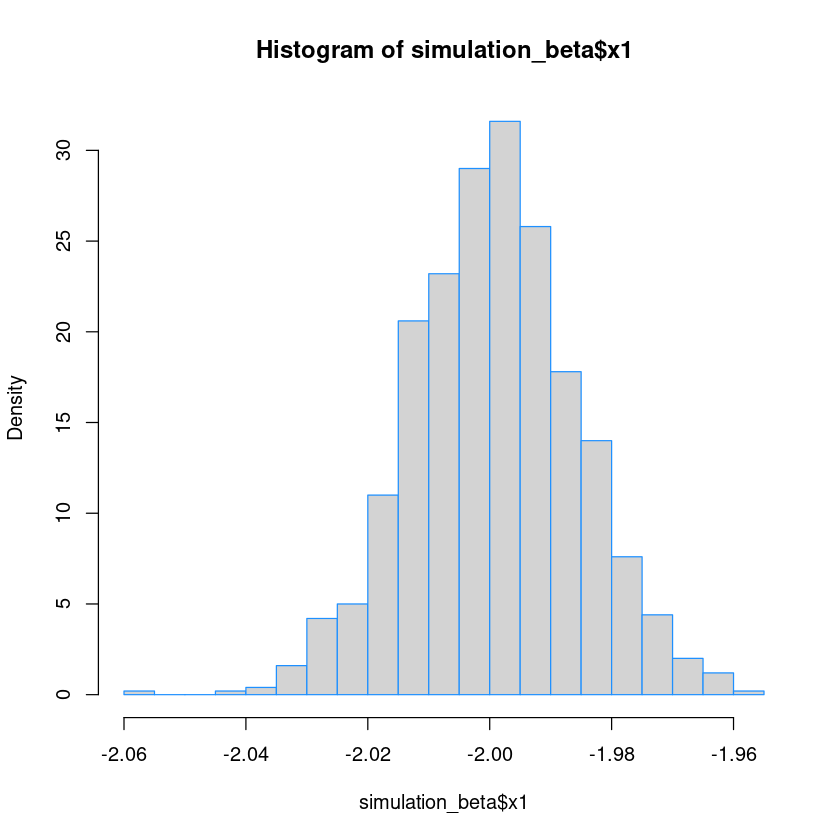

In [23]:
set.seed(1337)
n <- 100
p <- 3
beta_0 <- 5
beta_1 <- -2
beta_2 <- 6
beta <- c(beta_0, beta_1, beta_2)
sigma <- 4

simulate_data <- function() {
  x0 <- rep(1, n)
  x1 <- sample(seq_len(n))
  x2 <- sample(seq_len(n))
  X <- cbind(x0, x1, x2)
  eps <- rnorm(n, mean = 0, sd = sigma)
  y <- eps + X %*% beta
  sim_data <- tibble(x1, x2, y = as.vector(y))
}

sim_data <- simulate_data()

mod <- lm(y ~ x1 + x2, data = sim_data)

beta_hat <- solve(t(X) %*% X) %*% t(X) %*% y


coef(mod)
as.vector(beta_hat)
beta


sqrt(sum(resid(mod)^2)/ (n - p))
summary(mod)$sigma


B <- 1000
# simulation coefficients for 1000 times
simulation_beta <- replicate(B,
  {
    sim_data <- simulate_data()
    mod <- lm(y ~ x1 + x2, data = sim_data)
    coef(mod)
  },
  simplify = F
) %>% map_dfr(~.)


# sampling distribution of beta_1
hist(simulation_beta$x1, breaks = 20, prob = T, border = 'dodgerblue')


# compare the mean value of simulated beta versus the true value of beta
simulation_beta %>% map_dbl(mean)
beta




beta_hat_1,beta_2_pval,beta_3_pval
<dbl>,<dbl>,<dbl>
2.834596,2.129624e-11,0.45730817
2.775623,1.364940e-13,0.04848629
2.941223,6.616321e-11,0.70363594
3.307652,6.898728e-13,0.91280021
2.691872,1.818050e-12,0.97542166
3.157404,1.284115e-12,0.39105575


beta_hat_1_mean,beta_hat_1_var
<dbl>,<dbl>
3.006391,0.07303341


[1] 3

[1] 0.07316889

[1] 0.04666667

[1] 1

[1] 2 3 4 0 1

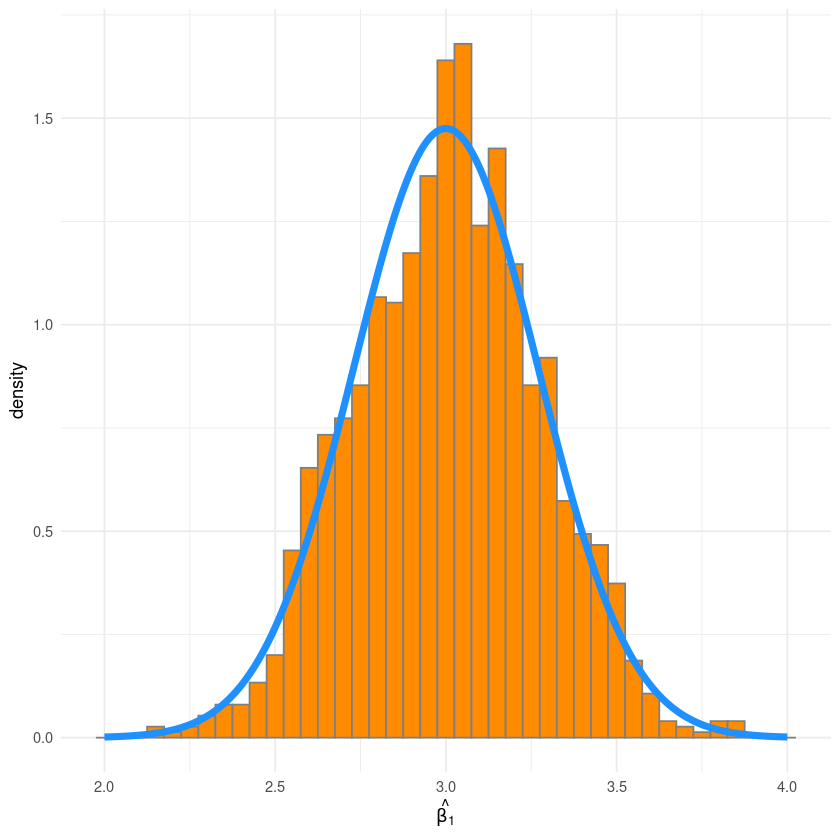

In [2]:
library(tidyverse)
library(broom)

beta <- c(2, 3, 4, 0, 1)
sigma <- 4
n <- 25

set.seed(42)
x0 <- rep(1, n)
x1 <- runif(n, 0, 10)
x2 <- runif(n, 0, 10)
x3 <- runif(n, 0, 10)
x4 <- runif(n, 0, 10)
X <- cbind(x0, x1, x2, x3, x4)
C <- solve(t(X) %*% X)
y <- as.vector(X %*% beta)
ex_4_data <- tibble(x1, x2, x3, x4, y)

nsim <- 1500


simulations <- replicate(nsim,
  {
    eps <- rnorm(n, mean = 0, sd = sigma)
    sample_data <- ex_4_data %>% mutate(y = y + eps)
    mod <- lm(y ~ ., data = sample_data)
    c(
      beta_hat_1 = coef(mod)[[2]],
      beta_2_pval = summary(mod)$coefficients[3, 4],
      beta_3_pval = summary(mod)$coefficients[4, 4]
    )
  },
  simplify = F
) %>% map_dfr(~.)

simulations %>% head()

# the mean of sd of beta_hat_1
simulations %>% summarize(across(beta_hat_1, list(mean = mean, var = var)))

# the mean of sd of beta1 in theory
beta[[2]]
sigma^2 * C[2, 2]

# samping distribution of beta1 (which is the distribution of beta_hat_1)
simulations %>%
  mutate(x = seq(2, 4, length.out = n()), 
         beta_1_sample = dnorm(x, mean = beta[[2]], sd = sigma * sqrt(C[2, 2]))) %>% 
  ggplot(aes(beta_hat_1, ..density..)) +
  geom_histogram(binwidth = .05, color = "grey50", fill = "darkorange") +
  geom_line(aes(x = x, y = beta_1_sample), color = "dodgerblue", size = 2) + 
  labs(x = expression(hat(beta[1]))) +
  theme_minimal()


# beta_3 is 0, H_0 is TRUE, 95% confidence so we expect
# 5% of the time we will make type I error (p_value < .05)
with(simulations, mean(beta_3_pval < 0.05))

# beta_2 = 3 is significantly difference from 0
# so almost anytime, p.value will < 0.05
with(simulations, mean(beta_2_pval < .05))

beta
